# Crazy Taxi 

# Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Created a dataframe by reading the csv file
df = pd.read_csv(r'/Users/Shruti/Documents/Data Science/Final Project/Crazy Taxi/data/raw/2017_Green_Taxi_Trip_Data.csv', parse_dates=['lpep_pickup_datetime','lpep_dropoff_datetime'], infer_datetime_format=True)

# Shuffling the data to randomize the order
from sklearn.utils import shuffle
df = shuffle(df)

# create a pickle file
# Much faster to load the data from pickle file 
df.to_pickle("/Users/Shruti/Documents/Data Science/Final Project/Crazy Taxi/data/interim/2017_Green_Taxi_Trip_Data.pkl")

In [2]:
# Reading the data into dataframe df from pickle file 
df1 = pd.read_pickle("/Users/Shruti/Documents/Data Science/Final Project/Crazy Taxi/data/interim/2017_Green_Taxi_Trip_Data.pkl")

In [3]:
df1.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
253078          1  2017-11-11 23:04:36   2017-11-11 23:09:20   
790700          1  2017-08-06 06:58:48   2017-08-06 07:01:55   
1565152         1  2017-04-09 18:33:38   2017-04-09 18:53:52   
2172160         1  2017-01-14 20:59:59   2017-01-14 21:05:59   
103484          1  2017-12-10 18:45:13   2017-12-10 18:55:31   

        store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
253078                   N           1            75            43   
790700                   N           1            75            74   
1565152                  N           1            51           259   
2172160                  N           1           166           151   
103484                   N           5           212           182   

         passenger_count  trip_distance  fare_amount  extra  mta_tax  \
253078                 1            1.3          6.0    0.5      0.5   
790700                 1            1.4          5.5    0.0      0.5   
1565152                1            4.0         17.5    0.0      0.5   
2172160                1            0.8          6.0    0.5      0.5   
103484                 1            1.6          8.0    0.0      0.0   

         tip_amount  tolls_amount  ehail_fee  improvement_surcharge  \
253078          0.0           0.0        NaN                    0.3   
790700          0.0           0.0        NaN                    0.3   
1565152         0.0           0.0        NaN                    0.3   
2172160         0.0           0.0        NaN                    0.3   
103484          0.0           0.0        NaN                    0.0   

         total_amount  payment_type  trip_type  
253078            7.3             2        1.0  
790700            6.3             1        1.0  
1565152          18.3             2        1.0  
2172160           7.3             2        1.0  
103484            8.0             2        2.0

In [4]:
# Data Cleaning & Preparation
df1.shape

(2293365, 19)

In [5]:
# Data types ands memory usage
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293365 entries, 253078 to 901900
Data columns (total 19 columns):
VendorID                 int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag       object
RatecodeID               int64
PULocationID             int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
dtypes: datetime64[ns](2), float64(10), int64(6), object(1)
memory usage: 349.9+ MB


In [6]:
# Checking the datatype of each column
df1.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                       float64
dtype: object

In [7]:
# Data Cleaning 
# Checking for null values 
print(pd.isnull(df1).sum())

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                2293365
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                     27
dtype: int64


In [8]:
# Dropping the not useful columns from the initial look
df1 = df1.drop(['ehail_fee','store_and_fwd_flag','VendorID'], axis = 1)

In [9]:
df1.head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
253078   2017-11-11 23:04:36   2017-11-11 23:09:20           1            75   
790700   2017-08-06 06:58:48   2017-08-06 07:01:55           1            75   
1565152  2017-04-09 18:33:38   2017-04-09 18:53:52           1            51   
2172160  2017-01-14 20:59:59   2017-01-14 21:05:59           1           166   
103484   2017-12-10 18:45:13   2017-12-10 18:55:31           5           212   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
253078             43                1            1.3          6.0    0.5   
790700             74                1            1.4          5.5    0.0   
1565152           259                1            4.0         17.5    0.0   
2172160           151                1            0.8          6.0    0.5   
103484            182                1            1.6          8.0    0.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
253078       0.5         0.0           0.0                    0.3   
790700       0.5         0.0           0.0                    0.3   
1565152      0.5         0.0           0.0                    0.3   
2172160      0.5         0.0           0.0                    0.3   
103484       0.0         0.0           0.0                    0.0   

         total_amount  payment_type  trip_type  
253078            7.3             2        1.0  
790700            6.3             1        1.0  
1565152          18.3             2        1.0  
2172160           7.3             2        1.0  
103484            8.0             2        2.0

In [11]:
print("Records with fare_amount 0 :" + str(df1.loc[df1['fare_amount'] == 0].shape))
print("minimum pickup date " + str(min(df1['lpep_pickup_datetime'])))
print("maximum pickup date " + str(max(df1['lpep_pickup_datetime'])))
print("minimum dropoff date " + str(min(df1['lpep_dropoff_datetime'])))
print("maximum dropoff date " + str(max(df1['lpep_dropoff_datetime'])))
print("Minimun time taken for the trip " + str(min(df1['lpep_dropoff_datetime']-df1['lpep_pickup_datetime'])))
print("Maximum time taken for the trip " + str(max(df1['lpep_dropoff_datetime']-df1['lpep_pickup_datetime'])))

Records with fare_amount 0 :(20704, 16)
minimum pickup date 2017-01-01 00:00:27
maximum pickup date 2017-12-31 23:59:50
minimum dropoff date 2017-01-01 00:03:16
maximum dropoff date 2018-01-01 00:33:59
Minimun time taken for the trip -2 days +08:03:55
Maximum time taken for the trip 1 days 15:19:20


In [12]:
from datetime import timedelta
print("dropoff time < 1s :" + str(df1[df1['lpep_dropoff_datetime']-df1['lpep_pickup_datetime'] < timedelta(seconds=1)].shape))
df1[df1['lpep_dropoff_datetime']-df1['lpep_pickup_datetime'] < timedelta(seconds=1)].head()

dropoff time < 1s :(4340, 16)


lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
571478   2017-09-15 22:13:13   2017-09-15 22:13:13           1            41   
1050026  2017-06-22 23:01:04   2017-06-22 23:01:04           1           129   
261263   2017-11-10 18:54:28   2017-11-10 18:54:28           1            97   
1785916  2017-03-11 12:37:45   2017-03-11 12:37:45           1            21   
1762963  2017-03-15 08:24:34   2017-03-15 08:24:34           1           159   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
571478            264                1            0.0          8.5    0.5   
1050026           264                1            0.0          5.0    0.5   
261263            264                1            0.0          8.0    0.0   
1785916           264                1            0.0          5.0    0.0   
1762963           264                1            0.0          3.0    0.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
571478       0.5         0.0           0.0                    0.3   
1050026      0.5         0.0           0.0                    0.3   
261263       0.5         0.0           0.0                    0.3   
1785916      0.5         0.0           0.0                    0.3   
1762963      0.5         0.0           0.0                    0.3   

         total_amount  payment_type  trip_type  
571478            9.8             2        1.0  
1050026           6.3             2        1.0  
261263            8.8             2        1.0  
1785916           5.8             2        1.0  
1762963           3.8             2        1.0

In [13]:
print("Min Passanger :" + str(min(df1['passenger_count'])))
print("Max Passanger :" + str(max(df1['passenger_count'])))

Min Passanger :0
Max Passanger :9


In [14]:
print("Min Trip Distance :" + str(min(df1['trip_distance'])))
print("Max Trip Distance :" + str(max(df1['trip_distance'])))

Min Trip Distance :0.0
Max Trip Distance :640.0


In [15]:
print("Min fare_amount :" + str(min(df1['fare_amount'])))
print("Max fare_amount :" + str(max(df1['fare_amount'])))

Min fare_amount :0.0
Max fare_amount :6003.5


In [16]:
print("Min extra :" + str(min(df1['extra'])))
print("Max extra :" + str(max(df1['extra'])))
print("Extra < 0" + str(df1[df1['extra'] < 0].shape))

Min extra :-0.67
Max extra :30.0
Extra < 0(2, 16)


In [17]:
print("Min mta_tax :" + str(min(df1['mta_tax'])))
print("Max mta_tax :" + str(max(df1['mta_tax'])))
print("mta_tax < 0" + str(df1[df1['mta_tax'] < 0].shape))

Min mta_tax :0.0
Max mta_tax :0.83
mta_tax < 0(0, 16)


In [18]:
print("Min tip_amount :" + str(min(df1['tip_amount'])))
print("Max tip_amount :" + str(max(df1['tip_amount'])))
print("tip_amount < 0" + str(df1[df1['tip_amount'] < 0].shape))

Min tip_amount :0.0
Max tip_amount :449.56
tip_amount < 0(0, 16)


In [19]:
print("Min tolls_amount :" + str(min(df1['tolls_amount'])))
print("Max tolls_amount :" + str(max(df1['tolls_amount'])))
df1[df1['tolls_amount'] > 500].head(10)

Min tolls_amount :0.0
Max tolls_amount :7999.92


lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
1883979  2017-02-26 21:57:49   2017-02-26 21:58:40           1            75   
1919026  2017-02-22 16:25:27   2017-02-22 16:32:43           1           159   
1926374  2017-02-21 11:28:16   2017-02-21 12:06:06           1           255   
1901263  2017-02-24 21:23:51   2017-02-24 21:26:16           1            74   
1659616  2017-03-28 15:32:05   2017-03-28 15:34:40           5           199   
2014041  2017-02-09 22:55:55   2017-02-09 23:17:16           1           255   
1929013  2017-02-20 21:21:14   2017-02-20 21:28:35           1            74   
870084   2017-07-23 00:58:04   2017-07-23 00:58:04           1            41   
1940746  2017-02-19 02:52:02   2017-02-19 03:17:07           1            41   
1923362  2017-02-21 20:42:55   2017-02-21 20:47:49           1           159   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
1883979            75                1            3.1         2.50    0.5   
1919026           168                1            1.3         7.00    1.0   
1926374           186                2            4.8        25.00    0.0   
1901263            42                1            0.3         3.50    0.5   
1659616           199                1            0.0       999.99    0.0   
2014041           261                1            8.2        26.00    0.5   
1929013            42                1            1.4         7.50    0.5   
870084            264                1            0.0         6.50    0.5   
1940746           244                1            4.1        20.50    0.5   
1923362            74                1            1.1         6.00    0.5   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
1883979      0.5         0.0        795.54                    0.3   
1919026      0.5         0.0        795.54                    0.3   
1926374      0.5         0.0        605.55                    0.3   
1901263      0.5         0.0        795.54                    0.3   
1659616      0.0         0.0       7999.92                    0.0   
2014041      0.5         0.0        554.09                    0.3   
1929013      0.5         0.0        795.54                    0.3   
870084       0.5         0.0        850.00                    0.3   
1940746      0.5         0.0       1591.08                    0.3   
1923362      0.5         0.0        795.54                    0.3   

         total_amount  payment_type  trip_type  
1883979        799.34             4        1.0  
1919026        804.34             4        1.0  
1926374        631.35             4        1.0  
1901263        800.34             4        1.0  
1659616       8999.91             2        2.0  
2014041        581.39             2        1.0  
1929013        804.34             4        1.0  
870084         857.80             2        1.0  
1940746       1612.88             2        1.0  
1923362        802.84             2        1.0

In [20]:
print("Min improvement_surcharge :" + str(min(df1['improvement_surcharge'])))
print("Max improvement_surcharge :" + str(max(df1['improvement_surcharge'])))
print("improvement_surcharge < 0" + str(df1[df1['improvement_surcharge'] < 0].shape))

Min improvement_surcharge :0.0
Max improvement_surcharge :0.3
improvement_surcharge < 0(0, 16)


In [21]:
print("Min total_amount :" + str(min(df1['total_amount'])))
print("Max total_amount :" + str(max(df1['total_amount'])))
print("total_amount > 500" + str(df1[df1['total_amount'] > 500].shape))

Min total_amount :0.0
Max total_amount :8999.91
total_amount > 500(19, 16)


In [22]:
# Records where totals does not sum up
# Create a totals column manually ?
df1[df1['total_amount'] != df1['fare_amount'] + df1['extra'] + df1['mta_tax'] + df1['tip_amount'] + df1['tolls_amount'] + df1['improvement_surcharge']].head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
598054   2017-09-11 03:08:14   2017-09-11 03:29:43           1            92   
419169   2017-10-13 18:51:16   2017-10-13 18:58:16           1           255   
1440168  2017-04-27 20:09:26   2017-04-27 20:23:02           1            97   
854572   2017-07-26 06:35:05   2017-07-26 06:43:33           1           145   
2154383  2017-01-12 16:38:09   2017-01-12 17:45:28           1           166   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
598054             68                1           11.4         32.5    0.5   
419169            256                1            0.9          6.5    1.0   
1440168           188                1            2.7         11.5    0.5   
854572            140                1            2.8         10.0    0.0   
2154383           138                1            8.3         43.5    1.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
598054       0.5        0.00          5.76                    0.3   
419169       0.5        1.65          0.00                    0.3   
1440168      0.5        2.55          0.00                    0.3   
854572       0.5        2.15          0.00                    0.3   
2154383      0.5       10.15          5.54                    0.3   

         total_amount  payment_type  trip_type  
598054          39.56             1        1.0  
419169           9.95             1        1.0  
1440168         15.35             1        1.0  
854572          12.95             1        1.0  
2154383         60.99             1        1.0

__Dropping rows summary__
- negative drop off time
- passenger_count <= 0
- trip_distance < 0
- negative extra
- tolls_amount > 500
- total_custom <= 0
- fare_amount <= 0
__Dropping Columns summary__
- ehail_fee
- store_and_fwd_flag
- VendorID
__New Columns Summary__
month
trip_duration
day_of_travel
total_custom

In [23]:
# Creating a copy of the original dataset
df_new = df1.copy()
df_new.shape

(2293365, 16)

In [24]:
# Detecting and dropping Outliers

# difference between Pickup time and dropoff time is less than 1 seconds
df_new = df1[df1['lpep_dropoff_datetime']-df1['lpep_pickup_datetime'] >= timedelta(seconds=1)]
# Passenger count < 0
df_new = df_new[df_new['passenger_count'] > 0]
# Negative trip distance
df_new = df_new[df_new['trip_distance'] > 0]
# Extra < 0
df_new = df_new[df_new['extra'] >= 0]
# Toll amount > 500
df_new = df_new[df_new['tolls_amount'] < 500]
# Fare amount > 1000
df_new = df_new[df_new['fare_amount'] < 1000]


In [25]:
df_new.shape

(2269468, 16)

In [27]:
# Additionally we can see that the fare amount may be negative in some cases, which is invalid
# Keeping only positive fare amount and total_custom data
#df_new = df_new[df_new['total_custom'] > 0]
df_new = df_new[df_new['fare_amount'] > 0]

# Feature Engineering 

__Features extracted:__

- Trip Duration (in minutes)
- Month of Trip
- Day of Trip
- Total Custom
- Weekend Trip Flag (0 - Weekday, 1 - Weekend)
- Hour of pickup time
- Airport Flag (1 - Pickup/Dropoff at JFK/Laguardia/ Newark Airport, 0 - Non-Airport Ride)

In [28]:
df_new['trip_duration'] = df_new['lpep_dropoff_datetime']-df_new['lpep_pickup_datetime']
df_new['trip_duration'] = df_new['trip_duration'].dt.total_seconds() / 60
df_new['month'] = df_new['lpep_pickup_datetime'].dt.month
df_new['day'] = df_new['lpep_pickup_datetime'].dt.dayofweek
df_new['total_custom'] = df_new['fare_amount'] + df_new['extra'] + df_new['mta_tax'] + df_new['tip_amount'] + df_new['tolls_amount'] + df_new['improvement_surcharge']
df_new['weekend_Trip'] = (df_new['day'] > 5).astype(int)
df_new['hour'] = df_new.lpep_pickup_datetime.apply(lambda t: t.hour)
df_new['airport'] = (df_new['PULocationID'].isin([1,132,138]) | df_new['DOLocationID'].isin([1,132,138])).astype(int)

/Users/Shruti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Shruti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Shruti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [29]:
df_new.head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
253078   2017-11-11 23:04:36   2017-11-11 23:09:20           1            75   
790700   2017-08-06 06:58:48   2017-08-06 07:01:55           1            75   
1565152  2017-04-09 18:33:38   2017-04-09 18:53:52           1            51   
2172160  2017-01-14 20:59:59   2017-01-14 21:05:59           1           166   
103484   2017-12-10 18:45:13   2017-12-10 18:55:31           5           212   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
253078             43                1            1.3          6.0    0.5   
790700             74                1            1.4          5.5    0.0   
1565152           259                1            4.0         17.5    0.0   
2172160           151                1            0.8          6.0    0.5   
103484            182                1            1.6          8.0    0.0   

         mta_tax   ...     total_amount  payment_type  trip_type  \
253078       0.5   ...              7.3             2        1.0   
790700       0.5   ...              6.3             1        1.0   
1565152      0.5   ...             18.3             2        1.0   
2172160      0.5   ...              7.3             2        1.0   
103484       0.0   ...              8.0             2        2.0   

         trip_duration  month  day  total_custom  weekend_Trip  hour  airport  
253078        4.733333     11    5           7.3             0    23        0  
790700        3.116667      8    6           6.3             1     6        0  
1565152      20.233333      4    6          18.3             1    18        0  
2172160       6.000000      1    5           7.3             0    20        0  
103484       10.300000     12    6           8.0             1    18        0  

[5 rows x 23 columns]

In [30]:
df_new.shape

(2249711, 23)

In [31]:
data = df_new.copy()

cost_pay = pd.DataFrame(columns=['credit', 'cash', 'no_charge', 'dispute', 'unknown', 'voided']);
for i in range (0, 24, 4):
    if (i == 20):
        d_dis = df_new[(df_new['trip_distance'] >= i)]
    else:
        d_dis = df_new[(df_new['trip_distance'] >= i) & (df_new['trip_distance'] < (i+4))];
    d_cr = d_dis[d_dis['payment_type']==1];
    d_ca = d_dis[d_dis['payment_type']==2];
    d_nc = d_dis[d_dis['payment_type']==3];
    d_dp = d_dis[d_dis['payment_type']==4];
    d_uk = d_dis[d_dis['payment_type']==5];
    d_vd = d_dis[d_dis['payment_type']==6];
    av_cr = 0
    av_ca = 0
    av_nc = 0
    av_dp = 0
    av_uk = 0
    av_vd = 0
    if (d_cr.shape[0] > 0):
        av_cr =  d_cr['fare_amount'].sum()/d_cr['trip_distance'].sum()
    if (d_ca.shape[0] > 0):
        av_ca =  d_ca['fare_amount'].sum()/d_ca['trip_distance'].sum()
    if (d_nc.shape[0] > 0):
        av_nc =  d_nc['fare_amount'].sum()/d_nc['trip_distance'].sum()
    if (d_dp.shape[0] > 0):
        av_dp =  d_dp['fare_amount'].sum()/d_dp['trip_distance'].sum()
    if (d_uk.shape[0] > 0):
        av_uk =  d_uk['fare_amount'].sum()/d_uk['trip_distance'].sum()
    if (d_vd.shape[0] > 0):
        av_vd =  d_vd['fare_amount'].sum()/d_vd['trip_distance'].sum()
    #print(av_cr)
    #print(av_ca)
    #print(av_uk)
    df_add = pd.DataFrame({'credit': av_cr, 'cash': av_ca, 'no_charge': av_nc, 'dispute': av_dp, 'unknown': av_uk, 'voided': av_vd}, index=[i])
    #print(df_add)
    cost_pay = cost_pay.append(df_add)
#cost_pay
bar1 = cost_pay.plot.bar(figsize=(15, 5))
bar1.set_xlabel = "Trip Distance"
bar1.set_ylabel = "Price per mile"


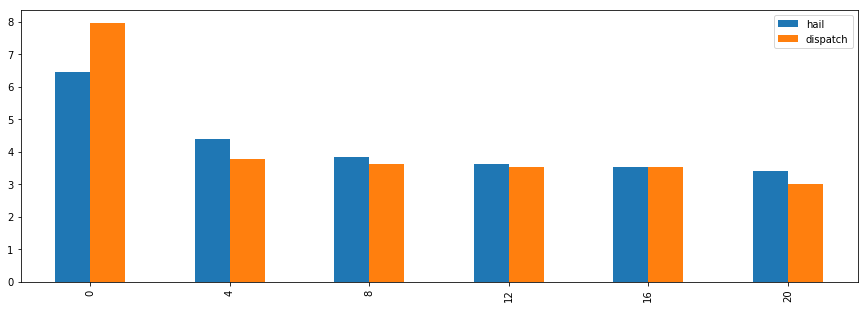

In [38]:
# Average price per mile for different distances for different trip type

cost_trip = pd.DataFrame(columns=['hail', 'dispatch']);
for i in range (0, 24, 4):
    if (i == 20):
        d_dis = data[(data['trip_distance'] >= i)]
    else:
        d_dis = data[(data['trip_distance'] >= i) & (data['trip_distance'] < (i+4))];
    d_hl = d_dis[d_dis['trip_type']==1];
    d_dp = d_dis[d_dis['trip_type']==2];
    av_hl = 0
    av_dp = 0
    if (d_hl.shape[0] > 0):
        av_hl =  d_hl['total_amount'].sum()/d_hl['trip_distance'].sum()
    if (d_dp.shape[0] > 0):
        av_dp =  d_dp['total_amount'].sum()/d_dp['trip_distance'].sum()
    #print(av_cr)
    #print(av_ca)
    #print(av_uk)
    df_add = pd.DataFrame({'hail': av_hl, 'dispatch': av_dp}, index=[i])
    #print(df_add)
    cost_trip = cost_trip.append(df_add)
#cost_trip
cost_trip.plot.bar(figsize=(15, 5))

In [39]:
# This might mean that hail is cheaper than Dispatch for short distance

In [40]:
cost_hr = pd.DataFrame(columns=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
ct_hr = pd.DataFrame(columns=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
for i in range (0, 24, 4):
    if (i == 20):
        d_dis = data[(data['trip_distance'] >= i)]
    else:
        d_dis = data[(data['trip_distance'] >= i) & (data['trip_distance'] < (i+4))];
    d_00 = d_dis[d_dis['hour']==0];
    d_01 = d_dis[d_dis['hour']==1];
    d_02 = d_dis[d_dis['hour']==2];
    d_03 = d_dis[d_dis['hour']==3];
    d_04 = d_dis[d_dis['hour']==4];
    d_05 = d_dis[d_dis['hour']==5];
    d_06 = d_dis[d_dis['hour']==6];
    d_07 = d_dis[d_dis['hour']==7];
    d_08 = d_dis[d_dis['hour']==8];
    d_09 = d_dis[d_dis['hour']==9];
    d_10 = d_dis[d_dis['hour']==10];
    d_11 = d_dis[d_dis['hour']==11];
    d_12 = d_dis[d_dis['hour']==12];
    d_13 = d_dis[d_dis['hour']==13];
    d_14 = d_dis[d_dis['hour']==14];
    d_15 = d_dis[d_dis['hour']==15];
    d_16 = d_dis[d_dis['hour']==16];
    d_17 = d_dis[d_dis['hour']==17];
    d_18 = d_dis[d_dis['hour']==18];
    d_19 = d_dis[d_dis['hour']==19];
    d_20 = d_dis[d_dis['hour']==20];
    d_21 = d_dis[d_dis['hour']==21];
    d_22 = d_dis[d_dis['hour']==22];
    d_23 = d_dis[d_dis['hour']==23];
    av_00 = 0
    av_01 = 0
    av_02 = 0
    av_03 = 0
    av_04 = 0
    av_05 = 0
    av_06 = 0
    av_07 = 0
    av_08 = 0
    av_09 = 0
    av_10 = 0
    av_11 = 0
    av_12 = 0
    av_13 = 0
    av_14 = 0
    av_15 = 0
    av_16 = 0
    av_17 = 0
    av_18 = 0
    av_19 = 0
    av_20 = 0
    av_21 = 0
    av_22 = 0
    av_23 = 0
    if (d_00.shape[0] > 0):
        av_00 =  d_00['fare_amount'].sum()/d_00['trip_distance'].sum()
    if (d_01.shape[0] > 0):
        av_01 =  d_01['fare_amount'].sum()/d_01['trip_distance'].sum()
    if (d_02.shape[0] > 0):
        av_02 =  d_02['fare_amount'].sum()/d_02['trip_distance'].sum()
    if (d_03.shape[0] > 0):
        av_03 =  d_03['fare_amount'].sum()/d_03['trip_distance'].sum()
    if (d_04.shape[0] > 0):
        av_04 =  d_04['fare_amount'].sum()/d_04['trip_distance'].sum()
    if (d_05.shape[0] > 0):
        av_05 =  d_05['fare_amount'].sum()/d_05['trip_distance'].sum()
    if (d_06.shape[0] > 0):
        av_06 =  d_06['fare_amount'].sum()/d_06['trip_distance'].sum()
    if (d_07.shape[0] > 0):
        av_07 =  d_07['fare_amount'].sum()/d_07['trip_distance'].sum()
    if (d_08.shape[0] > 0):
        av_08 =  d_08['fare_amount'].sum()/d_08['trip_distance'].sum()
    if (d_09.shape[0] > 0):
        av_09 =  d_09['fare_amount'].sum()/d_09['trip_distance'].sum()
    if (d_10.shape[0] > 0):
        av_10 =  d_10['fare_amount'].sum()/d_10['trip_distance'].sum()
    if (d_11.shape[0] > 0):
        av_11 =  d_11['fare_amount'].sum()/d_11['trip_distance'].sum()
    if (d_12.shape[0] > 0):
        av_12 =  d_12['fare_amount'].sum()/d_12['trip_distance'].sum()
    if (d_13.shape[0] > 0):
        av_13 =  d_13['fare_amount'].sum()/d_13['trip_distance'].sum()
    if (d_14.shape[0] > 0):
        av_14 =  d_14['fare_amount'].sum()/d_14['trip_distance'].sum()
    if (d_15.shape[0] > 0):
        av_15 =  d_15['fare_amount'].sum()/d_15['trip_distance'].sum()
    if (d_16.shape[0] > 0):
        av_16 =  d_16['fare_amount'].sum()/d_16['trip_distance'].sum()
    if (d_17.shape[0] > 0):
        av_17 =  d_17['fare_amount'].sum()/d_17['trip_distance'].sum()
    if (d_18.shape[0] > 0):
        av_18 =  d_18['fare_amount'].sum()/d_18['trip_distance'].sum()
    if (d_19.shape[0] > 0):
        av_19 =  d_19['fare_amount'].sum()/d_19['trip_distance'].sum()
    if (d_20.shape[0] > 0):
        av_20 =  d_20['fare_amount'].sum()/d_20['trip_distance'].sum()
    if (d_21.shape[0] > 0):
        av_21 =  d_21['fare_amount'].sum()/d_21['trip_distance'].sum()
    if (d_22.shape[0] > 0):
        av_22 =  d_22['fare_amount'].sum()/d_22['trip_distance'].sum()
    if (d_23.shape[0] > 0):
        av_23 =  d_23['fare_amount'].sum()/d_23['trip_distance'].sum()
    #print(av_cr)
    #print(av_ca)
    #print(av_uk)
    df_add = pd.DataFrame({'00':av_00,'01':av_01,'02':av_02,'03':av_03,'04':av_04,'05':av_05,'06':av_06,'07':av_07,'08':av_08,'09':av_09,'10':av_10,'11':av_11,'12':av_12,'13':av_13,'14':av_14,'15':av_15,'16':av_16,'17':av_17,'18':av_18,'19':av_19,'20':av_20,'21':av_21,'22':av_22,'23':av_23}, index=[i])
    df_add_ct = pd.DataFrame({'00':d_00.shape[0],'01':d_01.shape[0],'02':d_02.shape[0],'03':d_03.shape[0],'04':d_04.shape[0],'05':d_05.shape[0],'06':d_06.shape[0],'07':d_07.shape[0],'08':d_08.shape[0],'09':d_09.shape[0],'10':d_10.shape[0],'11':d_11.shape[0],'12':d_12.shape[0],'13':d_13.shape[0],'14':d_14.shape[0],'15':d_15.shape[0],'16':d_16.shape[0],'17':d_17.shape[0],'18':d_18.shape[0],'19':d_19.shape[0],'20':d_20.shape[0],'21':d_21.shape[0],'22':d_22.shape[0],'23':d_23.shape[0]}, index=[i])
    #print(df_add)
    cost_hr = cost_hr.append(df_add)
    ct_hr = ct_hr.append(df_add_ct)
cost_hr.sample(2)

00        01        02        03        04        05        06  \
16  2.920254  2.846463  2.911683  2.998924  2.861085  2.879653  2.868438   
4   3.529362  3.472434  3.454260  3.448287  3.395514  3.339753  3.431883   

          07        08        09    ...           14        15        16  \
16  2.885320  2.941611  2.898890    ...     3.013883  3.111643  3.115359   
4   3.657259  3.876121  3.837823    ...     3.915699  4.029505  4.118157   

          17        18        19        20       21        22        23  
16  3.077099  2.996905  2.974750  2.931701  2.99017  2.978800  2.940852  
4   4.084201  3.915025  3.744733  3.639051  3.59846  3.589344  3.565645  

[2 rows x 24 columns]

In [41]:
cost_hr = cost_hr.transpose()
#cost_hr
ct_hr = ct_hr.transpose()
ct_hr.sample(2)

0      4     8    12   16   20
02   36887   8715  2084  644  145  122
18  135926  17309  3215  914  435  180

x axis is different hours of a day from 00:00 to 23:59.
cout: y axis is number of trips.
average cost per mile: y axis is the price per mile.

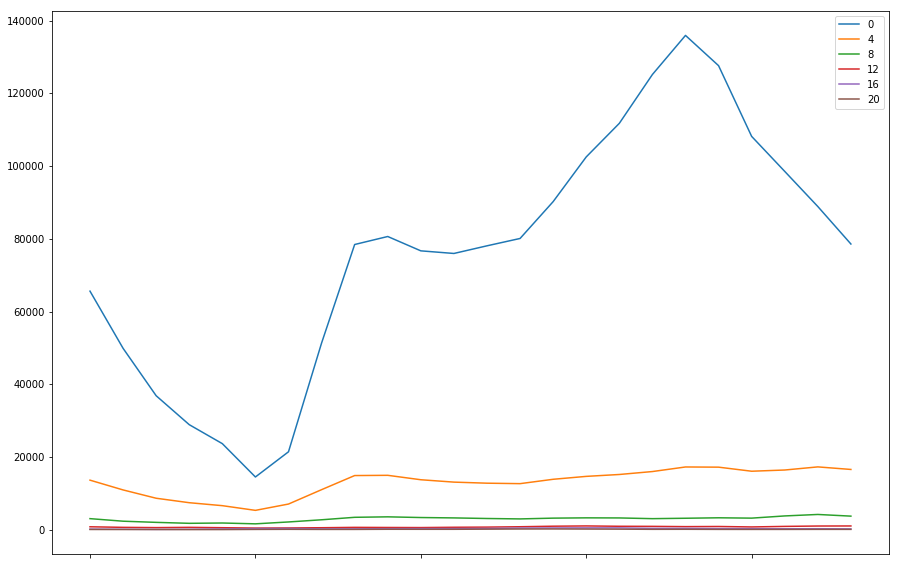

In [42]:
ct_hr.plot.line(figsize=(15, 10))

In [43]:
# as we can see from previous plot. Trips with distance smaller than 4 miles are way more frequent than others
# we discard that distance interval to better analyse others
del ct_hr[0]

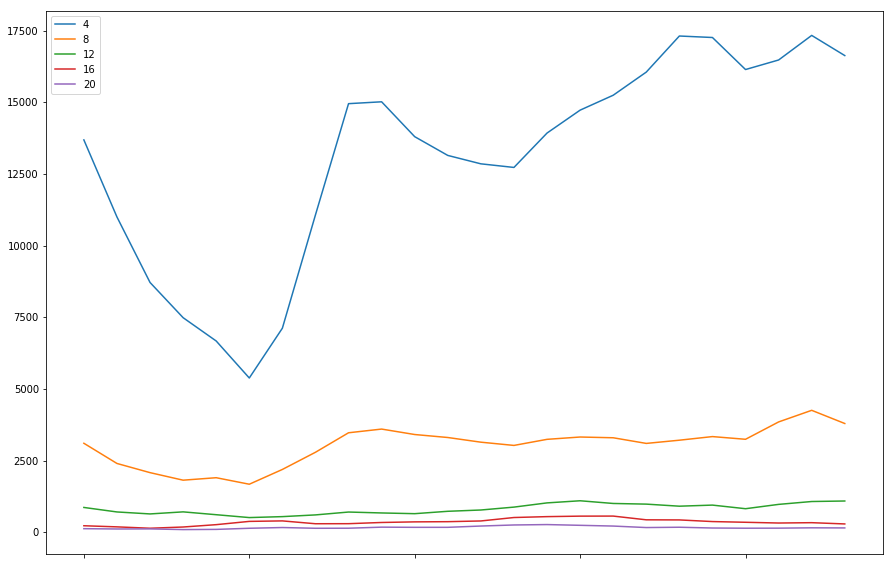

In [44]:
ct_hr.plot.line(figsize=(15, 10))

In [45]:
del ct_hr[4]

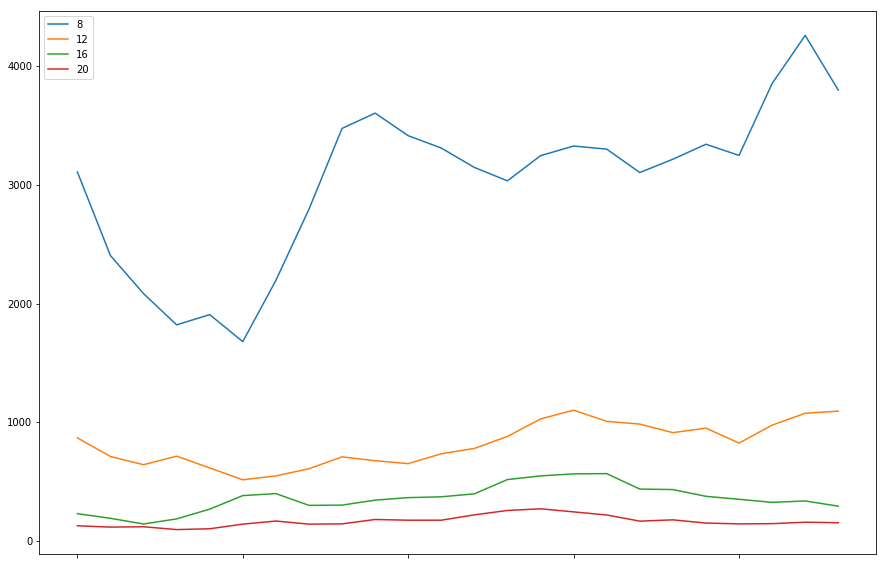

In [46]:
ct_hr.plot.line(figsize=(15, 10))

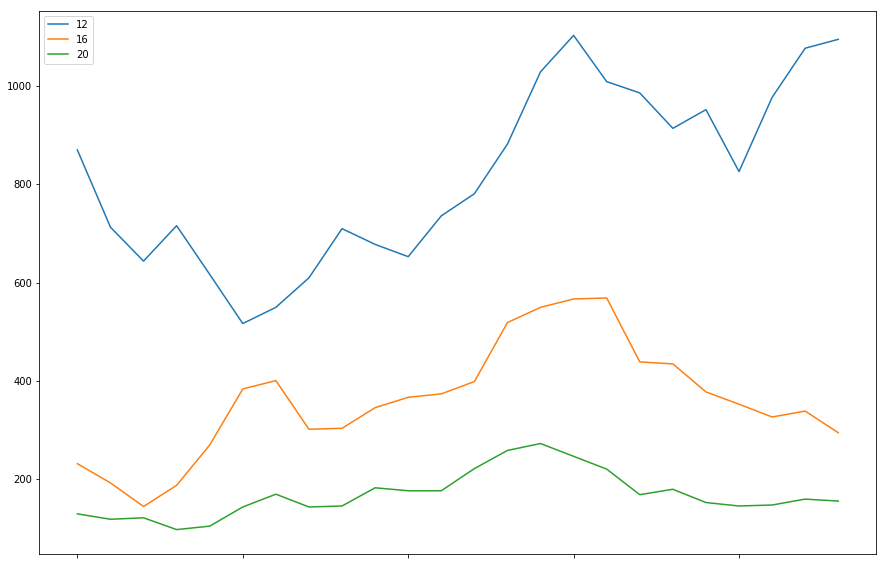

In [48]:
del ct_hr[8]
ct_hr.plot.line(figsize=(15, 10))

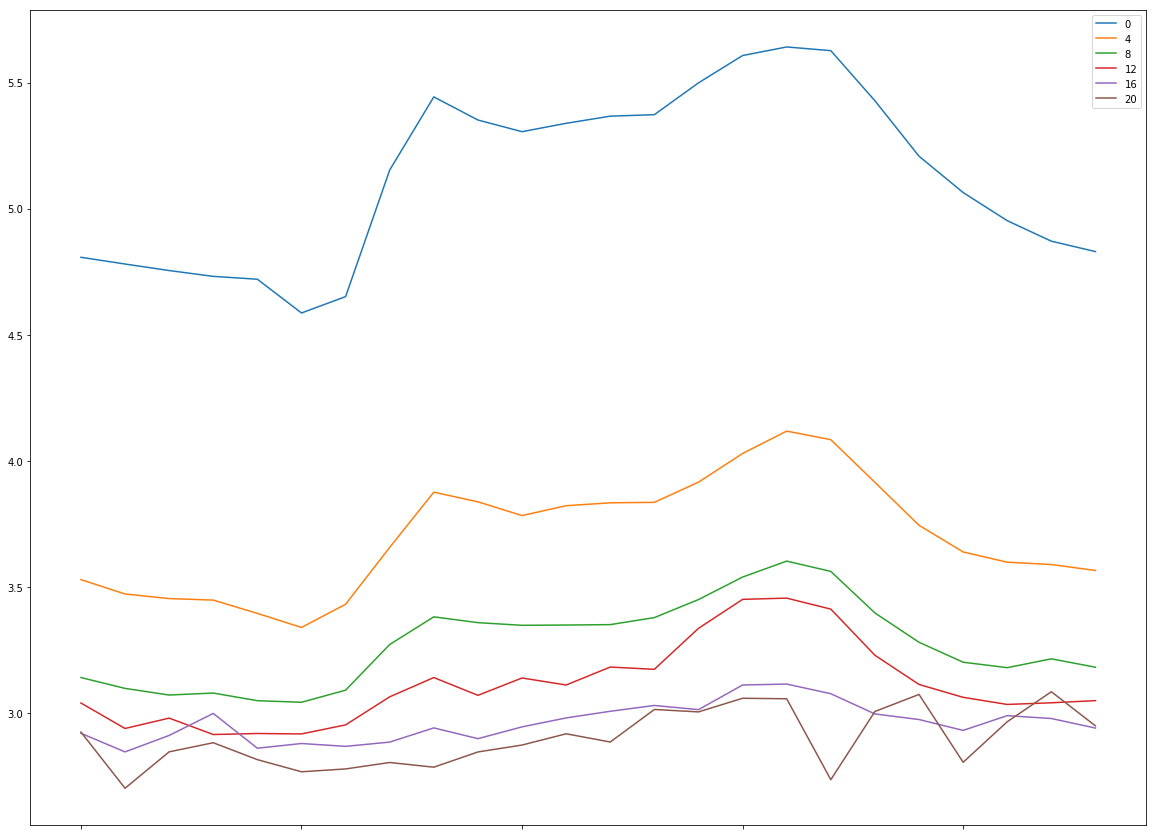

In [50]:
#
cost_hr.plot.line(figsize=(20, 15))

In [52]:
df_1 = df_new[['day','month','hour','fare_amount']]

In [53]:
df_1.head()

day  month  hour  fare_amount
253078     5     11    23          6.0
790700     6      8     6          5.5
1565152    6      4    18         17.5
2172160    5      1    20          6.0
103484     6     12    18          8.0

In [55]:
#monthwise aggregation
total_fare = (df_1.groupby(['month'])["fare_amount"].sum().reset_index())
# daywise aggregation 
day_fare = (df_1.groupby(['day'])["fare_amount"].sum().reset_index())

In [56]:
# monthwise aggregation of fare amount
total_fare.head()

month  fare_amount
0      1   2391973.86
1      2   2319380.37
2      3   2633115.66
3      4   2462175.04
4      5   2479153.05

In [57]:
day_fare.head()

day  fare_amount
0    0   3127433.86
1    1   3235273.40
2    2   3458808.22
3    3   3624915.77
4    4   4183840.52

In [59]:
#PLOTLY
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [66]:
# Visualizing time series monthwise
trace = go.Scatter(x = total_fare.month,y = total_fare.fare_amount,
                   mode = "lines+markers",
                   marker = dict(color = "royalblue",line = dict(width =1))
                  )
layout = go.Layout(dict(title = "Visualizing time series monthwise fare",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "Total Fare",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100)
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)

In [67]:
py.iplot(fig)

In [68]:
# Visualizing time series daywise
trace = go.Scatter(x = day_fare.day,y = day_fare.fare_amount,
                   mode = "lines+markers",
                   marker = dict(color = "royalblue",line = dict(width =1))
                  )
layout = go.Layout(dict(title = "Visualizing time series daywise fare",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "Total fare amount",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b = 100)
                       )
                  )
fig1 = go.Figure(data = [trace],layout = layout)

In [69]:
py.iplot(fig1)

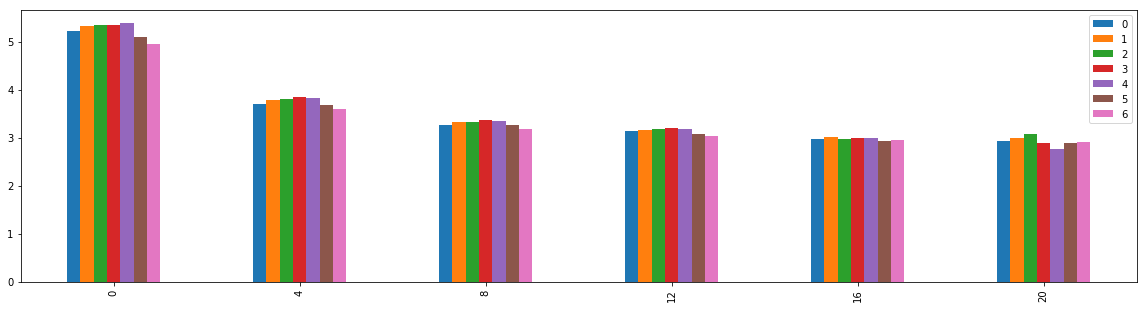

In [75]:
cost_diw = pd.DataFrame(columns=['0','1','2','3','4','5','6'])
for i in range (0, 24, 4):
    if (i == 20):
        d_dis = data[(data['trip_distance'] >= i)]
    else:
        d_dis = data[(data['trip_distance'] >= i) & (data['trip_distance'] < (i+4))];
    d_0 = d_dis[d_dis['day']==0];
    d_1 = d_dis[d_dis['day']==1];
    d_2 = d_dis[d_dis['day']==2];
    d_3 = d_dis[d_dis['day']==3];
    d_4 = d_dis[d_dis['day']==4];
    d_5 = d_dis[d_dis['day']==5];
    d_6 = d_dis[d_dis['day']==6];
    av_0 = 0
    av_1 = 0
    av_2 = 0
    av_3 = 0
    av_4 = 0
    av_5 = 0
    av_6 = 0
    if (d_0.shape[0] > 0):
        av_0 =  d_0['fare_amount'].sum()/d_0['trip_distance'].sum()
    if (d_1.shape[0] > 0):
        av_1 =  d_1['fare_amount'].sum()/d_1['trip_distance'].sum()
    if (d_2.shape[0] > 0):
        av_2 =  d_2['fare_amount'].sum()/d_2['trip_distance'].sum()
    if (d_3.shape[0] > 0):
        av_3 =  d_3['fare_amount'].sum()/d_3['trip_distance'].sum()
    if (d_4.shape[0] > 0):
        av_4 =  d_4['fare_amount'].sum()/d_4['trip_distance'].sum()
    if (d_5.shape[0] > 0):
        av_5 =  d_5['fare_amount'].sum()/d_5['trip_distance'].sum()
    if (d_6.shape[0] > 0):
        av_6 =  d_6['fare_amount'].sum()/d_6['trip_distance'].sum()
    df_add = pd.DataFrame({'0':av_0,'1':av_1,'2':av_2,'3':av_3,'4':av_4,'5':av_5,'6':av_6}, index=[i])
    #print(df_add)
    cost_diw = cost_diw.append(df_add)
#cost_diw = cost_diw.transpose()
#cost_diw
cost_diw.plot.bar(figsize=(20, 5))

# x label - Distance of trip
# y label - Average fare per mile
# Labels: Day of week

In [70]:
# Visualization using Bokeh

from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.resources import INLINE
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar

In [71]:
df_2 = (df_1.groupby(['month'])["fare_amount"].count().reset_index())

In [72]:
df_2.head()

month  fare_amount
0      1       212320
1      2       202463
2      3       232064
3      4       213473
4      5       211993

In [77]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
p = figure(plot_height=350,
    title="Number of Rides by Month",
    tools=TOOLS,
    toolbar_location='above')

p.vbar(x=df_2.month, top=df_2.fare_amount, width=0.9)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Ride Count'
p.select_one(HoverTool).tooltips = [
    ('Month', '@x'),
    ('Number of Rides', '@top'),
]
output_notebook(resources=INLINE)
output_file("barchart1.html", title="barchart")
show(p)

Loading BokehJS ...

In [78]:
# LINE CHART (Line chart is used primarily to show trend, i.e. whether there is an increase or decrese over a given x-axis)

df_3 = (df_1.groupby(['month'])["fare_amount"].sum().reset_index())

In [79]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Monthwise total fare amount", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Total Fare Amount'

p.line(df_3.month, df_3.fare_amount,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('month', '@x'),
    ('Total Fare Amount', '@y'),
]

output_notebook(resources=INLINE)
output_file("line_chart1.html", title="Line Chart")
show(p)

Loading BokehJS ...

Text(0,0.5,'Trip Distance')

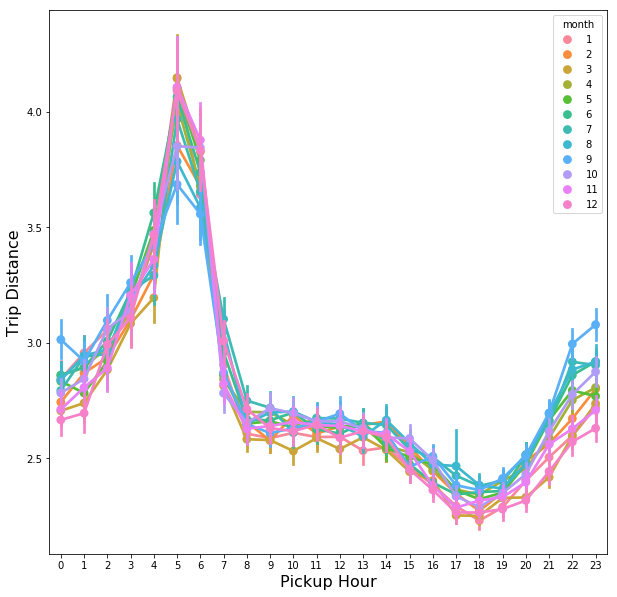

In [83]:
plt.figure(figsize=(10,10))
sns.pointplot(x='hour',y='trip_distance',data=df_new,kind='point',hue='month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Distance',fontsize=16)

Text(0,0.5,'Trip Duration')

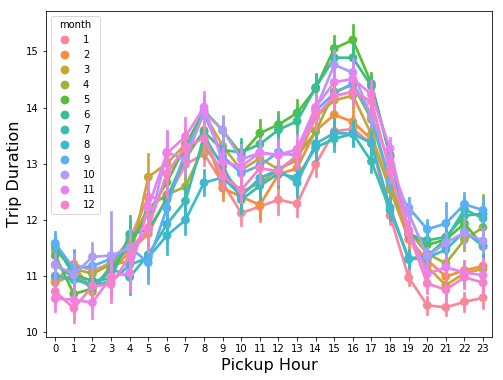

In [84]:
plt.figure(figsize=(8,6))
sns.pointplot(x='hour',y='trip_duration',data=df_new,kind='point',hue='month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration',fontsize=16)

Text(0,0.5,'Trip Distance')

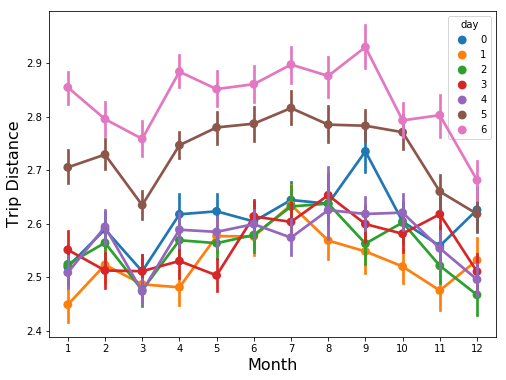

In [86]:
plt.figure(figsize=(8,6))
sns.pointplot(x='month',y='trip_distance',data=df_new,kind='point',hue='day')
plt.xlabel('Month',fontsize=16)
plt.ylabel('Trip Distance',fontsize=16)

In [88]:
# Trips for JFK airport Location ID - 132
df_JFK = df_new[(df_new.PULocationID == 132) | (df_new.DOLocationID == 132)]

In [89]:
df_JFK.head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  PULocationID  \
1679176  2017-03-25 19:11:16   2017-03-25 19:52:12           1            41   
1832178  2017-03-05 07:13:32   2017-03-05 07:40:15           1           181   
229366   2017-11-16 16:41:17   2017-11-16 18:02:55           2           166   
666620   2017-08-29 07:43:46   2017-08-29 08:10:13           2            74   
117141   2017-12-08 13:47:03   2017-12-08 14:50:53           1            52   

         DOLocationID  passenger_count  trip_distance  fare_amount  extra  \
1679176           132                1           18.0         51.5    0.0   
1832178           132                1           19.2         51.5    0.0   
229366            132                1           19.3         52.0    4.5   
666620            132                1           16.9         52.0    0.0   
117141            132                1           13.7         52.0    0.0   

         mta_tax   ...     total_amount  payment_type  trip_type  \
1679176      0.5   ...            65.56             1        1.0   
1832178      0.5   ...            62.75             1        1.0   
229366       0.5   ...            75.66             1        1.0   
666620       0.5   ...            67.56             1        1.0   
117141       0.5   ...            70.80             1        1.0   

         trip_duration  month  day  total_custom  weekend_Trip  hour  airport  
1679176      40.933333      3    5         65.56             0    19        1  
1832178      26.716667      3    6         62.75             1     7        1  
229366       81.633333     11    3         75.66             0    16        1  
666620       26.450000      8    1         67.56             0     7        1  
117141       63.833333     12    4         70.80             0    13        1  

[5 rows x 23 columns]

In [103]:
df_zones = pd.read_csv("/Users/Shruti/Documents/Data Science/Final Project/Crazy Taxi/data/raw/taxi_zone_lookup.csv")

In [104]:
df_zones.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [106]:
df_new.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

In [152]:
df_merge1 = pd.merge(df_new, df_zones, on='LocationID')

In [153]:
df_merge1.head()

lpep_pickup_datetime lpep_dropoff_datetime  RatecodeID  LocationID  \
0  2017-11-11 23:04:36   2017-11-11 23:09:20           1          75   
1  2017-08-06 06:58:48   2017-08-06 07:01:55           1          75   
2  2017-03-07 23:27:51   2017-03-07 23:33:26           1          75   
3  2017-03-17 08:02:27   2017-03-17 08:09:19           1          75   
4  2017-09-21 15:01:04   2017-09-21 15:08:50           1          75   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0            43                1            1.3          6.0    0.5      0.5   
1            74                1            1.4          5.5    0.0      0.5   
2            42                1            2.2          8.0    0.5      0.5   
3           168                2            2.0          8.0    0.0      0.5   
4            41                1            1.3          7.0    0.0      0.5   

       ...       trip_duration  month  day  total_custom  weekend_Trip  hour  \
0      ...            4.733333     11    5           7.3             0    23   
1      ...            3.116667      8    6           6.3             1     6   
2      ...            5.583333      3    1           9.3             0    23   
3      ...            6.866667      3    4           8.8             0     8   
4      ...            7.766667      9    3           7.8             0    15   

   airport    Borough               Zone  service_zone  
0        0  Manhattan  East Harlem South     Boro Zone  
1        0  Manhattan  East Harlem South     Boro Zone  
2        0  Manhattan  East Harlem South     Boro Zone  
3        0  Manhattan  East Harlem South     Boro Zone  
4        0  Manhattan  East Harlem South     Boro Zone  

[5 rows x 26 columns]

In [154]:
df_merge1.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

In [155]:
df_PUtop10 = pd.DataFrame(columns=['trip_count', 'LocationID'])
df_PUtop10['trip_count'] = df_merge1['PULocationID'].value_counts().sort_values(ascending=False)

df_PUtop10 = df_PUtop10.head(10)

df_PUtop10['LocationID'] = df_PUtop10.index
#df_crap = df_crap.head(10)
df_merge2 = pd.merge(df_PUtop10, df_zones, on='LocationID')

In [156]:
df_merge2

trip_count  LocationID    Borough                       Zone service_zone
0      155556          74  Manhattan          East Harlem North    Boro Zone
1      130789          41  Manhattan             Central Harlem    Boro Zone
2      122105          75  Manhattan          East Harlem South    Boro Zone
3      104227          82     Queens                   Elmhurst    Boro Zone
4       91137         255   Brooklyn  Williamsburg (North Side)    Boro Zone
5       86700          97   Brooklyn                Fort Greene    Boro Zone
6       84051          42  Manhattan       Central Harlem North    Boro Zone
7       83995           7     Queens                    Astoria    Boro Zone
8       82795         166  Manhattan        Morningside Heights    Boro Zone
9       77103         129     Queens            Jackson Heights    Boro Zone

Text(0,0.5,'Trip Count')

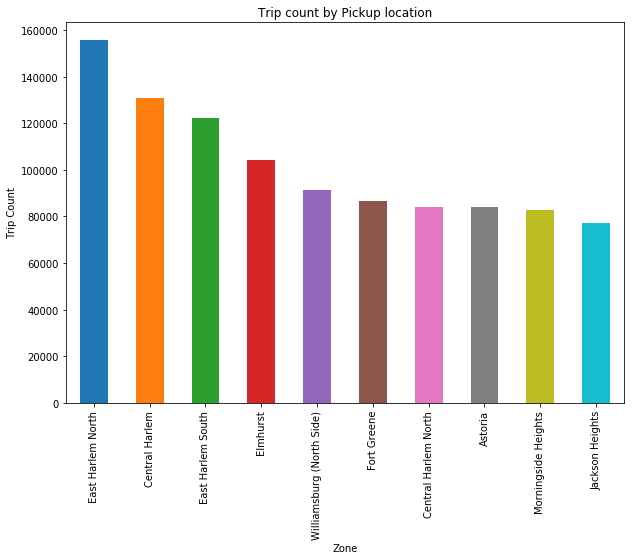

In [157]:
plt.figure(figsize=(10,7))
df_plot1 = df_merge2.set_index("Zone",inplace=True)
plot2 = df_merge2['trip_count'].plot(kind="bar",title = 'Trip count by Pickup location')
plot2.set_xlabel('Zone')
plot2.set_ylabel('Trip Count')

In [158]:
df_borough = df_merge1.groupby('Borough')

In [163]:
df_srs = df_borough.size().sort_values(ascending=False)

In [170]:
df_srs.values

array([888249, 740404, 539968,  76164,   4804,     97,     25])